#  Mann-Whitney Test

 Imagine if we could not remove the outlier point. What to do next? The next step 
would be to run a nonparametric alternative test to the Two Sample T Test. This is 
called the Mann-Whitney test, which evaluates to see if there is a statistically sig
nificant difference in the medians versus the means.

 The Mann-Whitney test is a nonparametric alternative to the Two Sample T Test. 
(Nonparametric refers to it not being normal or fitting a typical distribution.)

In [2]:
import numpy as np
import pandas as pd
from stats_tests import mannwhitney
from stats_plots import compare_hist

In [3]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Two Sample T Test",
        usecols = ["Defects per Airbag", "Shift"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()

,Defects per Airbag,Shift
0,0.189536,Before
1,0.196573,Before
2,0.104167,Before
3,0.207831,Before
4,0.197355,Before


In [4]:
df['Shift'] = df['Shift'].astype('category')

# Split directly
before = df.loc[df["Shift"] == "Before", "Defects per Airbag"].dropna()
after = df.loc[df["Shift"] == "After", "Defects per Airbag"].dropna()

In [5]:
results = mannwhitney(df, group_col="Shift", value_col="Defects per Airbag",
                                            group1="Before", group2="After")

Descriptive Statistics:
                                Group     N      Mean   Std Dev   SE Mean  \
0                              Before  29.0  0.198160  0.020311  0.003772   
1                               After  16.0  0.370162  0.029912  0.007478   
2  Median Difference (Before - After)   NaN       NaN       NaN       NaN   

     Median                 IQR  
0  0.201369            0.011644  
1  0.366876            0.041509  
2 -0.165508  [-0.1964, -0.1532]  

Mann–Whitney Test Results:
Mann–Whitney U: 0.0
p-value: 0.0
Interpretation: Reject null hypothesis → distributions differ significantly.


## Interpreting the results
 - Mann-Whitney medians (versus means).
 - This test is typically less powerful test than two sample T test (e.g., more likely to fail to reject the null when 
there really is a difference) but needed when the data is nonparametric.
 - Note P-value less than alpha 0.05, so we can conclude the medians are different (36.7% after and 20.1% before)

## Checking the similarly shaped distributions assumption

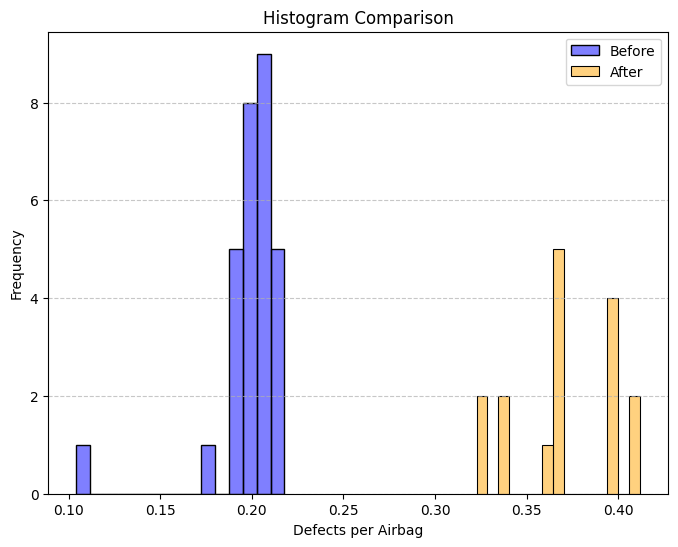

In [6]:
compare_hist(before, after, xlabel='Defects per Airbag')

 - $\textbf{Mann-Whitney assumes the distributions are similarly shaped}.$
 - In this case, it is hard to tell but seems both to be right centered.
 - Usually, a concern would be when the shapes are clearly different (e.g., when one is right centered and the other left).
 - Therefore, the assumptions of similar shaped distributions are accepted.